In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")


In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  43040 non-null  int64  
 1   carat       43040 non-null  float64
 2   cut         43040 non-null  object 
 3   color       43040 non-null  object 
 4   clarity     43040 non-null  object 
 5   depth       43040 non-null  float64
 6   table       43040 non-null  float64
 7   price       43040 non-null  int64  
 8   x           43040 non-null  float64
 9   y           43040 non-null  float64
 10  z           43040 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [6]:
diamond = train.drop("Unnamed: 0" , axis =1)
diamond_unnamed = train["Unnamed: 0"].copy

In [7]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


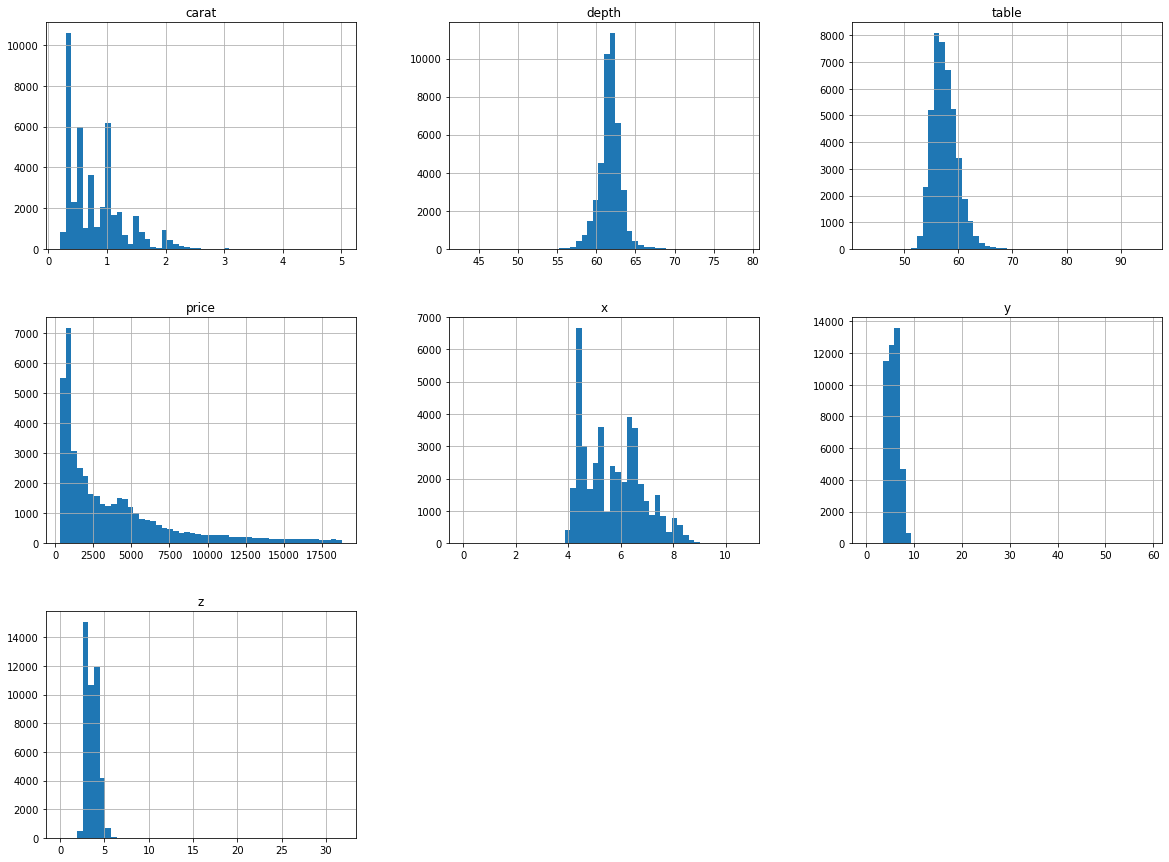

In [8]:
diamond.hist(bins = 50 , figsize = (20,15))
plt.show()

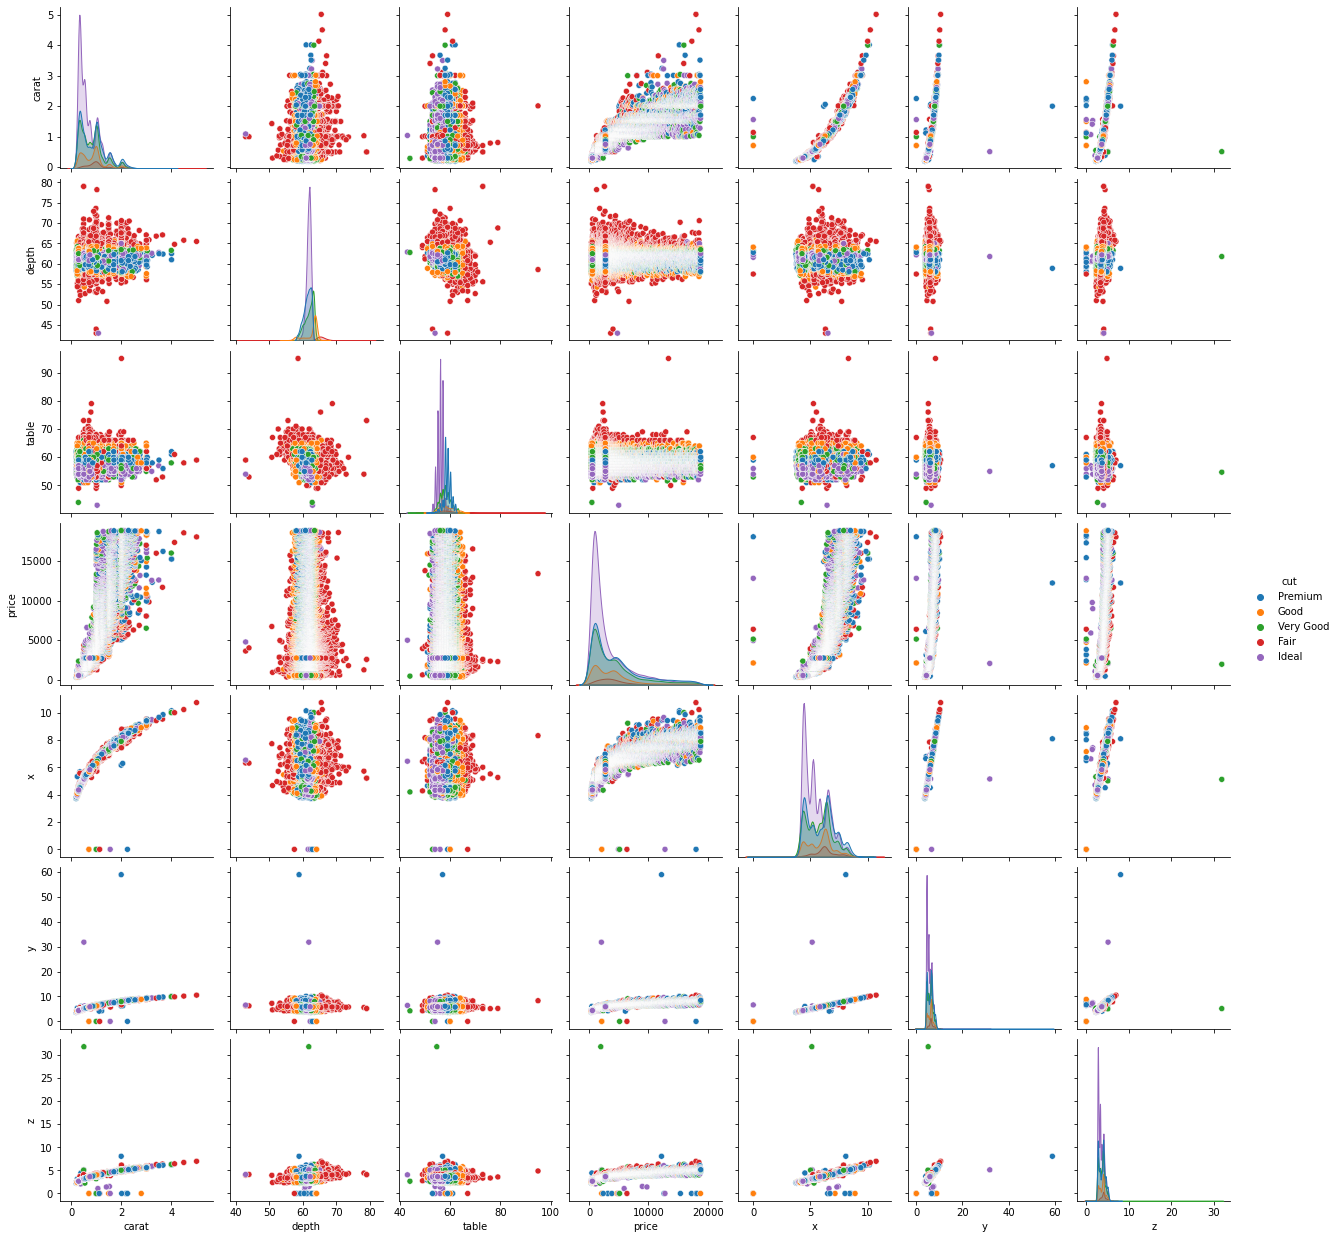

In [9]:
sns.pairplot(diamond, hue ='cut')
plt.show()

In [10]:
diamond = diamond.drop(diamond[diamond["x"]==0].index)
diamond = diamond.drop(diamond[diamond["y"]==0].index)
diamond = diamond.drop(diamond[diamond["z"]==0].index)

In [11]:
diamond['color'].value_counts().sort_values(ascending=False)

G    9074
E    7723
F    7523
H    6634
D    5555
I    4296
J    2218
Name: color, dtype: int64

In [12]:
diamond['clarity'].value_counts().sort_values(ascending=False)

SI1     10361
VS2      9978
SI2      7372
VS1      6478
VVS2     3959
VVS1     2838
IF       1483
I1        554
Name: clarity, dtype: int64

In [13]:
diamond['cut'].value_counts()

Ideal        17422
Premium      11022
Very Good     9406
Good          3906
Fair          1267
Name: cut, dtype: int64

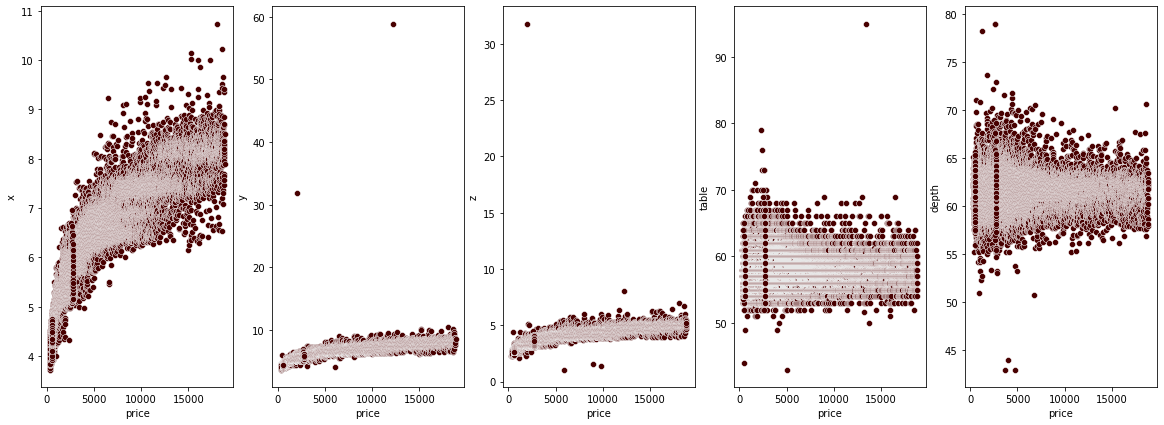

In [14]:
sns.set_palette("afmhot")
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamond, x = diamond['price'], y = diamond[i], ax = axs[c])
    c+=1

In [15]:
diamond.shape

(43023, 10)

In [16]:
diamond = diamond[(diamond['x'] < 30)]
diamond = diamond[(diamond['y'] < 30)]
diamond = diamond[(diamond['z'] < 30) & (diamond['z'] > 2)]
diamond = diamond[(diamond['table'] < 80) & (diamond['table'] > 40)]
diamond = diamond[(diamond['depth'] < 75) & (diamond['depth'] > 45)]

diamond.shape

(43010, 10)

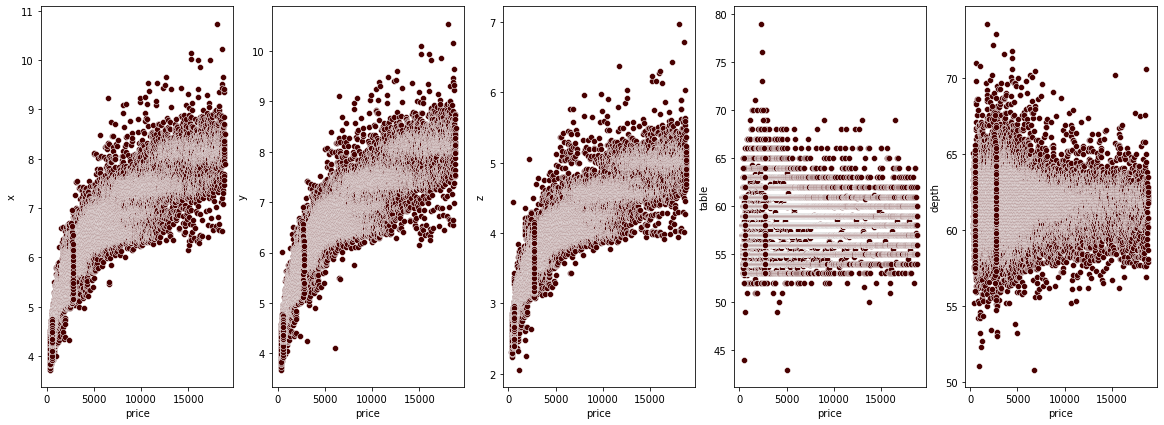

In [17]:
cols = ['x','y', 'z', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = diamond, x = diamond['price'], y = diamond[i], ax = axs[c])
    c+=1

In [18]:
print(diamond.color.unique())
print(diamond.cut.unique())
print(diamond.clarity.unique())

['E' 'I' 'J' 'F' 'H' 'D' 'G']
['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']


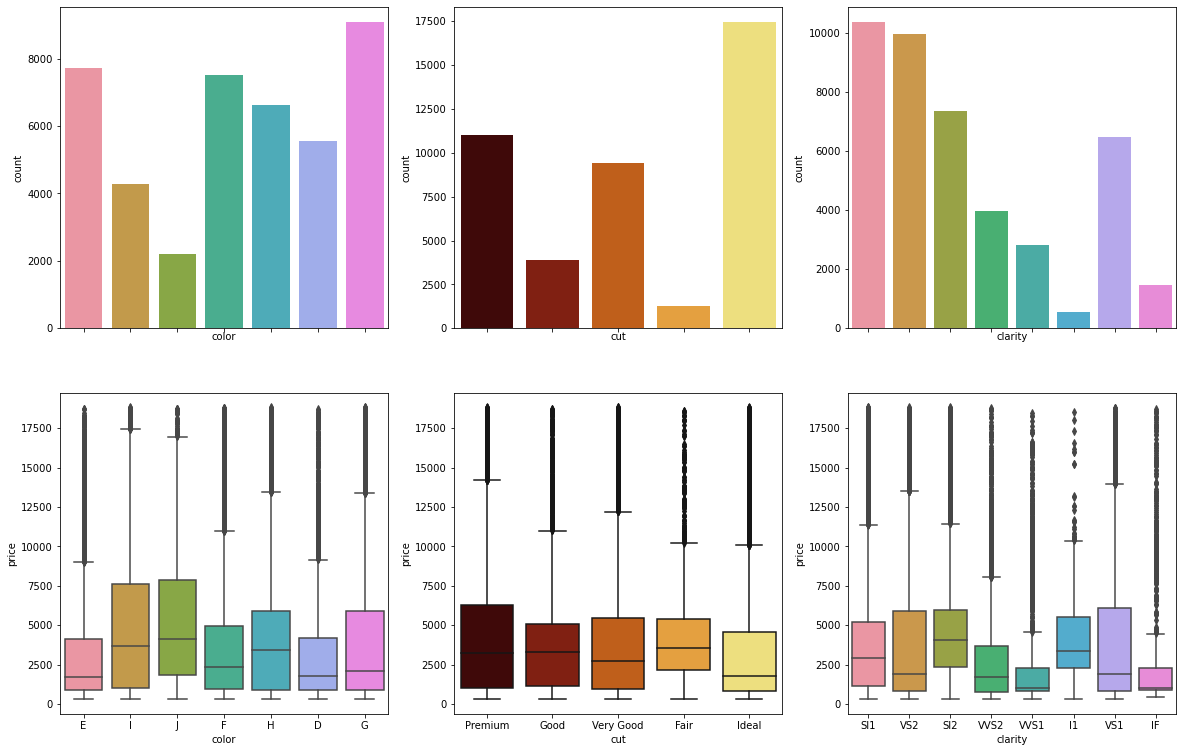

In [19]:
cats = ['color', 'cut', 'clarity']
c = 0

fig, axs = plt.subplots(ncols = len(cats), nrows = 2, sharex='col', figsize=(20,13))

for i in cats:
    sns.countplot(data = diamond, x = diamond[i], ax = axs[0,c])
    sns.boxplot(data = diamond, x = diamond[i], y = diamond['price'], ax = axs[1,c])
    c+=1

In [20]:
corr_matrix = diamond.corr()
corr_matrix["price"].sort_values(ascending = False)

price    1.000000
carat    0.923756
y        0.891676
x        0.890199
z        0.885660
table    0.137028
depth   -0.013994
Name: price, dtype: float64

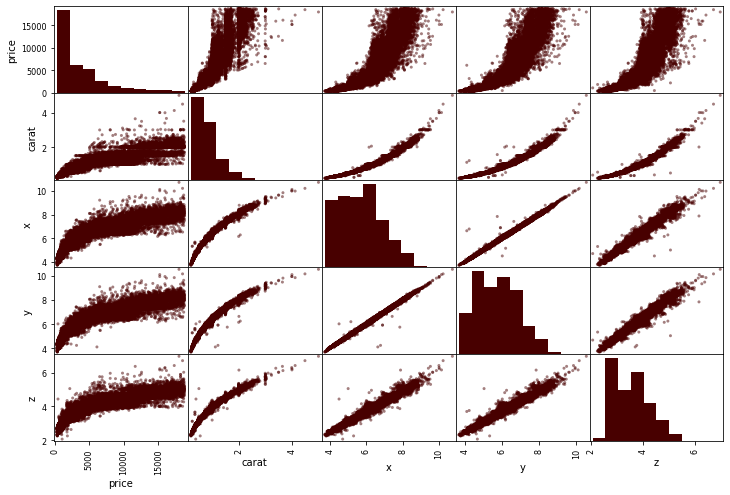

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["price" , "carat" , "x" , "y" , "z"]
scatter_matrix(diamond[attributes], figsize=(12, 8))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


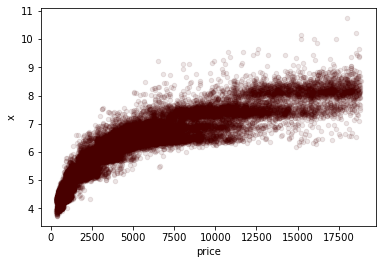

In [22]:
diamond.plot(kind="scatter", x="price", y="x",alpha=0.1)
plt.show()

In [23]:
diamond = diamond[(diamond["carat"] < 3.5)]

In [24]:
diamond = diamond[(diamond["x"] != 0)]
diamond = diamond[(diamond["z"] != 0)]

In [25]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [26]:
diamond_labels = diamond[["price"]]
diamond_train = diamond.drop("price" , axis = 1)

In [27]:
diamond_num = diamond_train.drop("cut" , axis=1)
diamond_num = diamond_num.drop("color" , axis=1)
diamond_num = diamond_num.drop("clarity" , axis=1)
diamond_num

,carat,depth,table,x,y,z
0,0.21,59.8,61.0,3.89,3.84,2.31
1,0.29,62.4,58.0,4.20,4.23,2.63
2,0.31,63.3,58.0,4.34,4.35,2.75
3,0.24,62.8,57.0,3.94,3.96,2.48
4,0.24,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...
43035,0.72,62.7,59.0,5.69,5.73,3.58
43036,0.72,60.8,57.0,5.75,5.76,3.50
43037,0.72,63.1,55.0,5.69,5.75,3.61
43038,0.86,61.0,58.0,6.15,6.12,3.74


In [28]:
diamond_cut = diamond[["cut"]]
diamond_color = diamond[["color"]]
diamond_clarity = diamond[["clarity"]]


In [29]:
diamond_cat = diamond[["cut", "color" , "clarity"]]
diamond_cat

,cut,color,clarity
0,Premium,E,SI1
1,Premium,I,VS2
2,Good,J,SI2
3,Very Good,J,VVS2
4,Very Good,I,VVS1
...,...,...,...
43035,Premium,D,SI1
43036,Ideal,D,SI1
43037,Good,D,SI1
43038,Premium,H,SI2


In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
ordinal_encoder = OrdinalEncoder()
diamond_cut_encoded = ordinal_encoder.fit_transform(diamond_cut)
diamond_color_encoded = ordinal_encoder.fit_transform(diamond_color)
diamond_clarity_encoded = ordinal_encoder.fit_transform(diamond_clarity)


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

diamond_num_tr = num_pipeline.fit_transform(diamond_num)

In [33]:
from sklearn.compose import ColumnTransformer

In [34]:
diamond_train

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [35]:
num_attribs = list(diamond_num)
cat_attribs1 = ["cut"]
cat_attribs2 = ["color"]
cat_attribs3 = ["clarity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat1", OrdinalEncoder(), cat_attribs1),
        ("cat2", OrdinalEncoder(), cat_attribs2),
        ("cat3", OrdinalEncoder(), cat_attribs3),
        
    ])

diamond_prepared = full_pipeline.fit_transform(diamond_train)

In [36]:
diamond_prepared

array([[-1.22393006, -1.37124949,  1.59771124, ...,  3.        ,
         1.        ,  2.        ],
       [-1.05679838,  0.46083473,  0.25215864, ...,  3.        ,
         5.        ,  5.        ],
       [-1.01501546,  1.09501773,  0.25215864, ...,  1.        ,
         6.        ,  3.        ],
       ...,
       [-0.15846561,  0.95408817, -1.09339395, ...,  1.        ,
         0.        ,  2.        ],
       [ 0.13401483, -0.52567216,  0.25215864, ...,  3.        ,
         4.        ,  3.        ],
       [-0.09579123,  0.31990517, -1.09339395, ...,  2.        ,
         0.        ,  3.        ]])

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(diamond_prepared , diamond_labels)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
diamond_predictions = lin_reg.predict(diamond_prepared)
lin_rmse = mean_squared_error(diamond_labels, diamond_predictions, squared=False)
lin_rmse

1323.5178316420713

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, diamond_prepared, diamond_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(diamond_prepared, diamond_labels)
diamond_predictions = forest_reg.predict(diamond_prepared)
forest_mse = mean_squared_error(diamond_labels, diamond_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

C:\Users\ali_emad\AppData\Local\Temp\ipykernel_18868\2107549055.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(diamond_prepared, diamond_labels)


206.95464630085937

In [41]:
submission = test[["Unnamed: 0"]]
x_test = test.drop("Unnamed: 0" , axis = 1)
x_test_prepared = full_pipeline.transform(x_test)
predictions = forest_reg.predict(x_test_prepared)

submission["price"] = predictions

C:\Users\ali_emad\AppData\Local\Temp\ipykernel_18868\1370576469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["price"] = predictions


In [42]:
submission.to_csv("submission.csv" , index = False)

In [43]:
pd.read_csv("submission.csv")

,Unnamed: 0,price
0,1,409.92
1,3,412.24
2,8,408.51
3,10,405.76
4,12,438.28
...,...,...
10895,53922,2717.08
10896,53923,2937.57
10897,53933,2872.07
10898,53934,2895.13
